In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('C:/Users/User/Downloads/sonar.all-data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [50]:
pd.set_option('display.max_rows',None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [14]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
dtype: int64

In [15]:
df[0]

0      0.0200
1      0.0453
2      0.0262
3      0.0100
4      0.0762
5      0.0286
6      0.0317
7      0.0519
8      0.0223
9      0.0164
10     0.0039
11     0.0123
12     0.0079
13     0.0090
14     0.0124
15     0.0298
16     0.0352
17     0.0192
18     0.0270
19     0.0126
20     0.0473
21     0.0664
22     0.0099
23     0.0115
24     0.0293
25     0.0201
26     0.0151
27     0.0177
28     0.0100
29     0.0189
30     0.0240
31     0.0084
32     0.0195
33     0.0442
34     0.0311
35     0.0206
36     0.0094
37     0.0333
38     0.0123
39     0.0091
40     0.0068
41     0.0093
42     0.0211
43     0.0093
44     0.0257
45     0.0408
46     0.0308
47     0.0373
48     0.0190
49     0.0119
50     0.0353
51     0.0131
52     0.0087
53     0.0293
54     0.0132
55     0.0201
56     0.0152
57     0.0216
58     0.0225
59     0.0125
60     0.0130
61     0.0135
62     0.0086
63     0.0067
64     0.0071
65     0.0176
66     0.0265
67     0.0368
68     0.0195
69     0.0216
70     0.0065
71    

In [25]:
df.iloc[:,0:-1].shape

(208, 60)

In [30]:
df[60]

0      R
1      R
2      R
3      R
4      R
5      R
6      R
7      R
8      R
9      R
10     R
11     R
12     R
13     R
14     R
15     R
16     R
17     R
18     R
19     R
20     R
21     R
22     R
23     R
24     R
25     R
26     R
27     R
28     R
29     R
30     R
31     R
32     R
33     R
34     R
35     R
36     R
37     R
38     R
39     R
40     R
41     R
42     R
43     R
44     R
45     R
46     R
47     R
48     R
49     R
50     R
51     R
52     R
53     R
54     R
55     R
56     R
57     R
58     R
59     R
60     R
61     R
62     R
63     R
64     R
65     R
66     R
67     R
68     R
69     R
70     R
71     R
72     R
73     R
74     R
75     R
76     R
77     R
78     R
79     R
80     R
81     R
82     R
83     R
84     R
85     R
86     R
87     R
88     R
89     R
90     R
91     R
92     R
93     R
94     R
95     R
96     R
97     M
98     M
99     M
100    M
101    M
102    M
103    M
104    M
105    M
106    M
107    M
108    M
109    M
110    M
1

In [31]:
import seaborn as sns

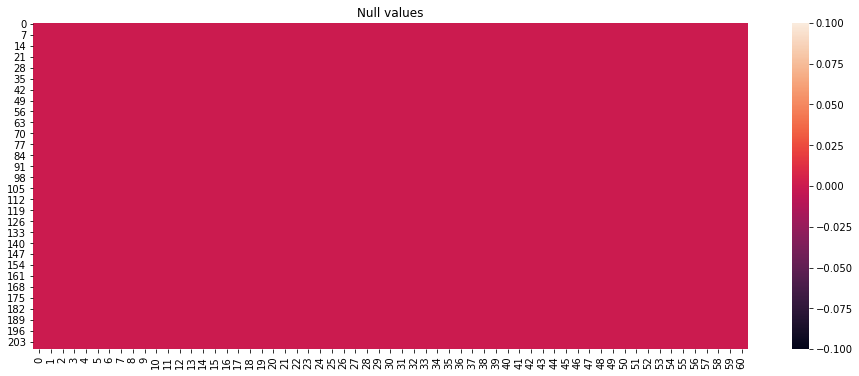

In [34]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

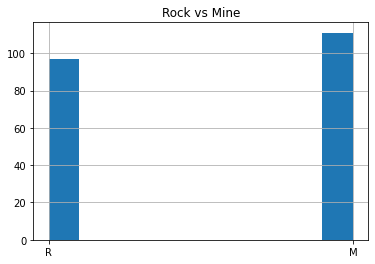

In [39]:
df[60].hist(grid=True)  ## Example of univariate analysis
plt.title('Rock vs Mine')
plt.show()

In [38]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


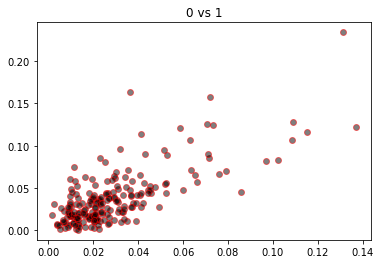

In [46]:
plt.scatter(df[0],df[1],alpha=0.5,c=(0,0,0),edgecolors='r')  ## example of bivariate analysis
plt.title('0 vs 1')
plt.show()

In [47]:
corr_mat = df.corr() ## example of multivariate analysis

In [48]:
corr_mat

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


In [ ]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df[60])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


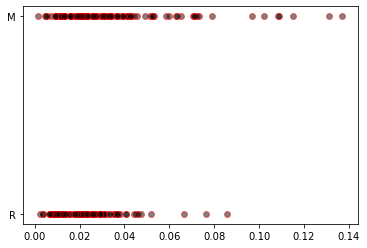

In [54]:
plt.scatter(df[0],df[60],alpha=0.5,c=(0,0,0),edgecolors='r')

In [58]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,1


In [60]:
df.drop(60,inplace=True)

In [61]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,1


In [66]:
corr_matrix=df.corr()
corr_matrix['class'].sort_values(ascending=False)

class    1.000000
35       0.267209
34       0.225294
36       0.207186
33       0.169582
30       0.109002
32       0.105099
31       0.052886
39       0.040044
37       0.039683
16       0.007977
56       0.002587
15      -0.005736
29      -0.006948
17      -0.011317
40      -0.017337
24      -0.030620
25      -0.034849
28      -0.040606
14      -0.052528
38      -0.053411
26      -0.061263
23      -0.079423
59      -0.085436
27      -0.087602
54      -0.090194
6       -0.112717
55      -0.126458
58      -0.126705
5       -0.130406
22      -0.133996
18      -0.135851
52      -0.137695
41      -0.138581
13      -0.152661
53      -0.177086
49      -0.177550
57      -0.180432
7       -0.187461
2       -0.188373
21      -0.205675
4       -0.220815
19      -0.224344
1       -0.226643
42      -0.228781
20      -0.244633
3       -0.250428
43      -0.268805
0       -0.269119
51      -0.286658
50      -0.291279
46      -0.297333
45      -0.302028
12      -0.308168
8       -0.322040
47      -0

In [68]:
## since correlation of 16,56,etc is very less with output variable .they can be dropped

In [70]:
## remove the outliers before x , y split

In [71]:
x = df.drop('class',axis=1)
y = df['class']

In [72]:
#checking skewness

In [76]:
x = x.drop(60,axis=1)

In [78]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [79]:
x.skew()

0     2.125130
1     2.161953
2     2.652695
3     3.391841
4     2.010169
5     1.240905
6     0.963750
7     1.473606
8     1.629185
9     1.273991
10    0.980338
11    0.581864
12    0.735926
13    1.018525
14    0.757744
15    0.690131
16    0.646727
17    0.518077
18    0.275944
19   -0.086245
20   -0.248993
21   -0.384283
22   -0.588904
23   -0.685184
24   -0.783017
25   -0.669301
26   -0.622905
27   -0.608069
28   -0.433897
29   -0.125404
30    0.265009
31    0.319881
32    0.429893
33    0.570958
34    0.599796
35    0.627083
36    0.683237
37    1.033838
38    0.901404
39    0.853906
40    0.856019
41    0.859219
42    0.911235
43    1.240108
44    1.362895
45    1.705161
46    1.795810
47    1.281689
48    1.275974
49    1.754763
50    2.708642
51    2.086642
52    1.055166
53    1.096481
54    1.793863
55    1.773892
56    1.646315
57    2.095883
58    1.734322
59    2.778741
dtype: float64

In [82]:
## removing skewness

In [83]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)
df_new = pd.DataFrame(df_new,columns=x.columns)

In [84]:
df_new.skew()

0     0.198127
1     0.200784
2     0.184836
3     0.191830
4     0.140429
5     0.039052
6     0.018235
7     0.039815
8     0.079171
9     0.073278
10    0.047047
11    0.031660
12    0.023439
13    0.037257
14    0.068357
15    0.100767
16    0.121991
17    0.092442
18    0.017608
19   -0.074964
20   -0.106664
21   -0.142277
22   -0.177536
23   -0.160756
24   -0.202987
25   -0.201125
26   -0.192418
27   -0.164556
28   -0.131376
29   -0.046436
30   -0.001223
31    0.006042
32    0.021305
33    0.049274
34    0.080279
35    0.090402
36    0.103021
37    0.088498
38    0.077400
39    0.034193
40    0.060871
41    0.047872
42    0.030771
43    0.083922
44    0.168660
45    0.167618
46    0.122373
47    0.096307
48    0.132756
49    0.105224
50    0.075683
51    0.146959
52    0.127697
53    0.126488
54    0.190529
55    0.118854
56    0.198065
57    0.217907
58    0.163723
59    0.203179
dtype: float64

In [85]:
x = df_new

In [87]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.280790,0.265066,0.284690,-0.980074,0.677040,0.074346,0.664060,0.550906,1.259752,0.259044,...,0.881892,-1.711919,-0.546428,0.879440,-0.115279,1.495739,1.630811,0.393683,0.496343,-0.786176
1,1.087889,0.799340,1.344070,0.733780,1.044161,2.025734,1.446449,1.952514,1.380515,0.810089,...,-0.171868,-0.490145,-0.095387,-0.938666,0.306820,1.712536,1.260944,-0.404346,-0.344303,-0.343224
2,0.158495,0.966229,1.704543,1.451208,0.712579,1.785059,1.728024,2.074133,2.140428,2.106490,...,-1.526836,1.255635,0.983914,-0.013126,1.374746,2.058426,2.183600,1.451973,0.585532,0.607017
3,-1.194255,-0.747213,0.878364,-0.990189,-1.357060,-1.411336,-0.059827,0.132257,-1.316989,-0.564285,...,0.951485,0.102750,-1.185420,0.774432,0.143577,0.042377,-0.403955,-0.542542,-0.681462,1.303289
4,1.810413,1.172177,0.466901,-0.161425,-0.114904,-0.658362,0.137815,1.363709,1.490072,1.591391,...,0.181657,-1.611529,-0.775825,0.150945,0.568079,-1.668296,0.154248,-0.431442,0.782681,0.933530


In [88]:
##checking oulliers

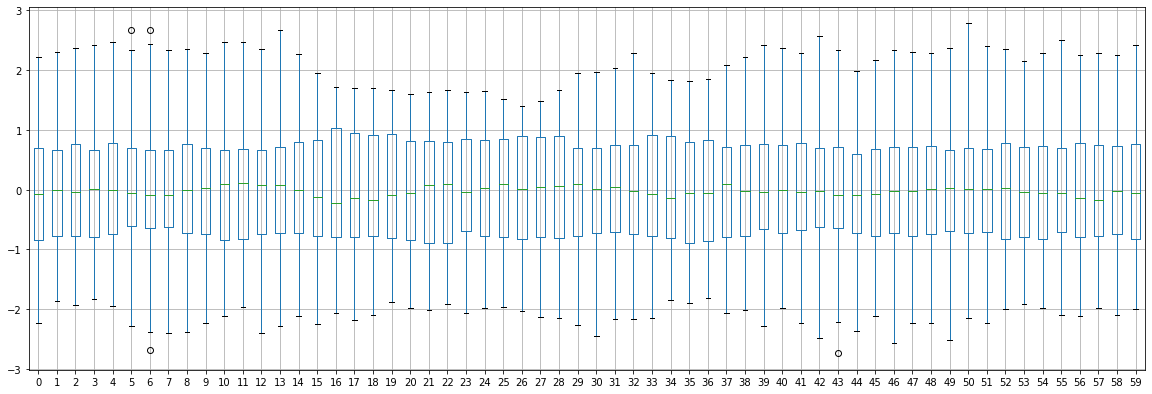

In [89]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

<AxesSubplot:>

<Figure size 1440x576 with 0 Axes>

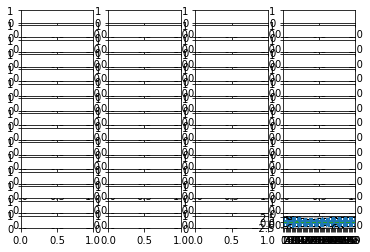

In [96]:
plt.figure(figsize=[20,8])
plt.subplots(15,4)
x.boxplot()

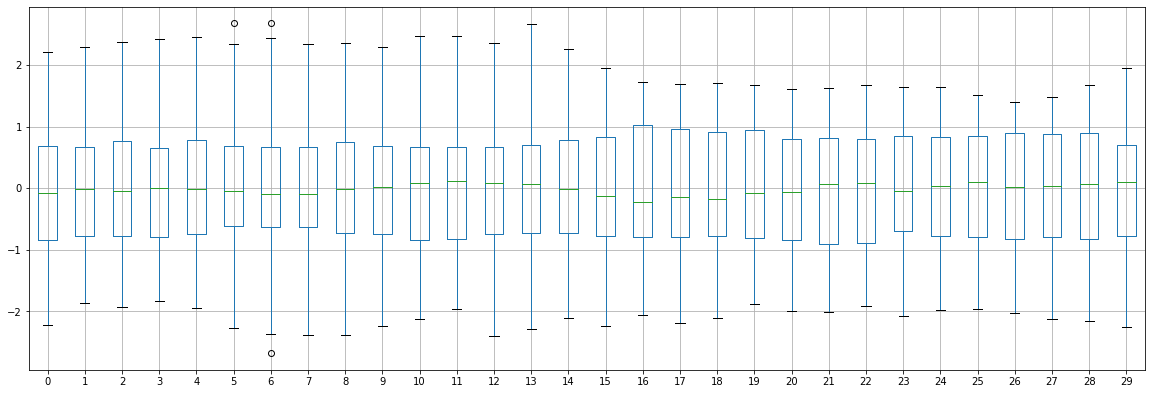

In [94]:
##boxplot for 1st 30 columns
x.iloc[:,0:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

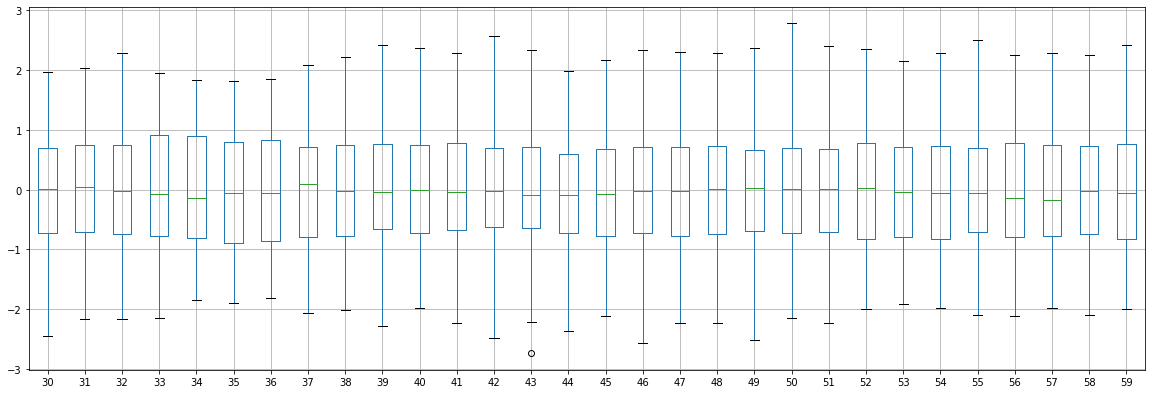

In [98]:
##boxplot for remaining 30 columns
x.iloc[:,30:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [99]:
## finding best random_state

In [101]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predlr = lr.predict(x_test)
    acc =accuracy_score(y_test,predlr)
    if acc > maxAccu :
        maxAccu = acc
        maxRS =i

In [102]:
print('Best accuracy is : ',maxAccu, 'on Random_state',maxRS)

Best accuracy is :  0.9206349206349206 on Random_state 28


In [103]:
##creating train_test_split

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=28)

In [109]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9206349206349206
[[33  2]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        35
           1       0.93      0.89      0.91        28

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



In [111]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6666666666666666
[[19 16]
 [ 5 23]]
              precision    recall  f1-score   support

           0       0.79      0.54      0.64        35
           1       0.59      0.82      0.69        28

    accuracy                           0.67        63
   macro avg       0.69      0.68      0.67        63
weighted avg       0.70      0.67      0.66        63



In [113]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9682539682539683
[[35  0]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.93      0.96        28

    accuracy                           0.97        63
   macro avg       0.97      0.96      0.97        63
weighted avg       0.97      0.97      0.97        63



In [114]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9682539682539683
[[35  0]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.93      0.96        28

    accuracy                           0.97        63
   macro avg       0.97      0.96      0.97        63
weighted avg       0.97      0.97      0.97        63



In [115]:
## we are getting higher accuracy in some models it can be due to overfitting so we will check validation scores

In [117]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,x,y,cv=5)
print('cross validation score of logisticRegression model :',scr.mean())

cross validation score of logisticRegression model : 0.6673635307781649


In [118]:
from sklearn.model_selection import cross_val_score
dtc = cross_val_score(dt,x,y,cv=5)
print('cross validation score of logisticRegression model :',dtc.mean())

cross validation score of logisticRegression model : 0.6337979094076654


In [119]:
from sklearn.model_selection import cross_val_score
rfc = cross_val_score(rf,x,y,cv=5)
print('cross validation score of logisticRegression model :',rfc.mean())

cross validation score of logisticRegression model : 0.691637630662021


In [122]:
from sklearn.model_selection import cross_val_score
svmc = cross_val_score(svc,x,y,cv=5)
print('cross validation score of logisticRegression model :',svmc.mean())

cross validation score of logisticRegression model : 0.6379790940766552


In [123]:
## min difference in accuracy and cross val score is for decision tree classifier so this is our best model

In [124]:
## hyperparameter tuning

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
parameters = {'criterion':["gini", "entropy"],
              'splitter' :["best", "random"],
              'max_depth':np.arange(1,20),
              }

In [128]:
GCV = GridSearchCV(estimator=dt ,param_grid=parameters,n_jobs=-1, cv=5 )

In [129]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'splitter': ['best', 'random']})

In [130]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}

In [131]:
best_model = DecisionTreeClassifier(criterion='gini', max_depth= 5, splitter='random',random_state=28)

In [132]:
best_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=28, splitter='random')

In [133]:
pred = best_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

76.19047619047619


In [134]:
##saving the model

In [135]:
import joblib

In [136]:
joblib.dump(best_model,'SonarModelDTC.pkl')

['SonarModelDTC.pkl']

In [137]:
model = joblib.load('SonarModelDTC.pkl')

In [138]:
prediction = model.predict(x_test)